model3那些坑爹的数据等会再说吧。。先直接实现出混合策略模型看看情况会不会有所改善。没时间了

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import tensorflow as tf

In [2]:
%%time
import edward as ed
from edward.models import Dirichlet, InverseGamma, MultivariateNormalDiag, \
    Normal, ParamMixture,Empirical

Wall time: 12.6 s


In [3]:
# priori model test

sess = ed.get_session()
tf.global_variables_initializer().run()

先试试看每次都标准化狄利克雷分布的alpha的策略能不能正确作为proposal分布正常工作。

In [8]:
X = np.zeros((600))
X[0:100] = np.random.normal(loc=0,scale=1,size = 100)
X[100:300] = np.random.normal(loc=10,scale=3,size = 200)
X[300:] = np.random.normal(loc=20,scale=5,size = 300)

In [7]:
X[:100].mean(),X[:100].std()

(0.19444714420310313, 0.97954303940375509)

In [8]:
X[100:300].mean(),X[100:300].std()

(10.213075556147132, 3.2336795908707385)

In [47]:
alphas = ed.models.Normal(loc=[1.,1.,1.],scale=[0.1,0.1,0.1])

p = ed.models.Dirichlet(alphas)
c = ed.models.Categorical(probs=p, sample_shape=600)


In [48]:
mu = tf.gather([0.,10.,20.],c)

In [49]:
Y = Normal(loc = mu,scale=tf.ones(600))

In [51]:
T = 1000

qalphas = ed.models.Empirical(tf.Variable(tf.ones((T,3))))

In [52]:
galphas = ed.models.Normal(loc=alphas,scale=[0.1,0.1,0.1])

In [53]:
inference = ed.MetropolisHastings({alphas: qalphas},
                      {alphas: galphas},
                      {Y: X})

In [54]:
inference.run()

 140/1000 [ 14%] ████                           ETA: 5s | Acceptance Rate: 0.511

InvalidArgumentError: indices[0] = 3 is not in [0, 3)
	 [[Node: inference_270623240/new/Gather_2 = Gather[Tindices=DT_INT32, Tparams=DT_FLOAT, validate_indices=true, _device="/job:localhost/replica:0/task:0/cpu:0"](inference_270623240/new/Gather_2/params, inference_270623240/new/Categorical_7/sample/Reshape_2)]]

Caused by op 'inference_270623240/new/Gather_2', defined at:
  File "C:\Users\yiyuezhuo\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\traitlets\config\application.py", line 596, in launch_instance
    app.start()
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\tornado\ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2831, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-1df50299666e>", line 1, in <module>
    inference.run()
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\edward\inferences\inference.py", line 123, in run
    self.initialize(*args, **kwargs)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\edward\inferences\monte_carlo.py", line 98, in initialize
    self.train = self.build_update()
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\edward\inferences\metropolis_hastings.py", line 127, in build_update
    x_znew = copy(x, dict_swap_new, scope=scope_new)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\edward\util\random_variables.py", line 228, in copy
    kwargs[key] = copy_default(value, dict_swap, scope, True, copy_q)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\edward\util\random_variables.py", line 84, in copy_default
    x = copy(x, *args, **kwargs)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\edward\util\random_variables.py", line 244, in copy
    new_op = copy(op, dict_swap, scope, True, copy_q)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\edward\util\random_variables.py", line 290, in copy
    op_def)
  File "C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1203, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): indices[0] = 3 is not in [0, 3)
	 [[Node: inference_270623240/new/Gather_2 = Gather[Tindices=DT_INT32, Tparams=DT_FLOAT, validate_indices=true, _device="/job:localhost/replica:0/task:0/cpu:0"](inference_270623240/new/Gather_2/params, inference_270623240/new/Categorical_7/sample/Reshape_2)]]


In [12]:
ed.models.Categorical?

In [13]:

p = ed.models.Dirichlet([1.,1.,1.])
c = ed.models.Categorical(probs=p, sample_shape=600)
mu = tf.gather([0.,10.,20.],c)
Y = Normal(loc = mu,scale=tf.ones(600))

In [14]:
T = 1000

qp = ed.models.Empirical(tf.Variable(tf.ones((T,3))))

In [15]:
gp = ed.models.Dirichlet(p/tf.reduce_sum(p))

In [16]:
inference = ed.MetropolisHastings({p: qp},
                      {p: gp},
                      {Y: X})

In [17]:
inference.run()

1000/1000 [100%] ██████████████████████████████ Elapsed: 1s | Acceptance Rate: 0.158


In [18]:
qp.params.shape

TensorShape([Dimension(1000), Dimension(3)])

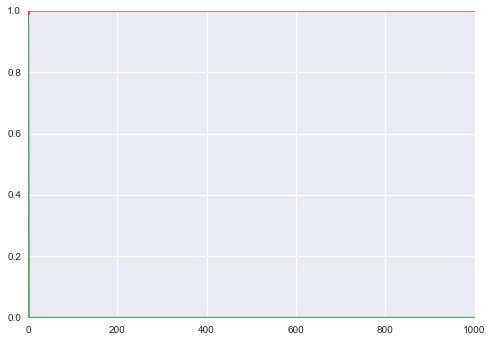

In [19]:
plt.plot(qp.params.eval())

In [20]:
qp.params.eval()

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  1.15567297e-02,   1.97374364e-04,   9.88245904e-01],
       [  1.99564477e-38,   1.99564477e-38,   1.00000000e+00],
       ..., 
       [  1.77073693e-38,   1.77073693e-38,   1.00000000e+00],
       [  1.77073693e-38,   1.77073693e-38,   1.00000000e+00],
       [  1.77073693e-38,   1.77073693e-38,   1.00000000e+00]], dtype=float32)

In [21]:
p.eval()

array([ 0.06041613,  0.36482444,  0.57475942], dtype=float32)

In [23]:
ed.models.Dirichlet?

In [33]:
from collections import Counter

In [34]:
Counter(ed.models.Categorical(logits=[0.,0.,0.],sample_shape=100).eval())

Counter({0: 38, 1: 31, 2: 31})

In [35]:
#p = ed.models.Dirichlet([1.,1.,1.])
weights = ed.models.Normal(loc=[0.,0.,0.],scale=[1.,1.,1.])
c = ed.models.Categorical(logits=weights, sample_shape=600)
mu = tf.gather([0.,10.,20.],c)
Y = Normal(loc = mu,scale=tf.ones(600))

In [43]:
T = 10000

qweights = Empirical(tf.Variable(tf.zeros([T,3])))
gweights = Normal(loc=weights, scale=[0.1,0.1,0.1])

In [44]:
inference = ed.MetropolisHastings({weights: qweights},
                      {weights: gweights},
                      {Y: X})

In [45]:
inference.run()

10000/10000 [100%] ██████████████████████████████ Elapsed: 6s | Acceptance Rate: 0.514


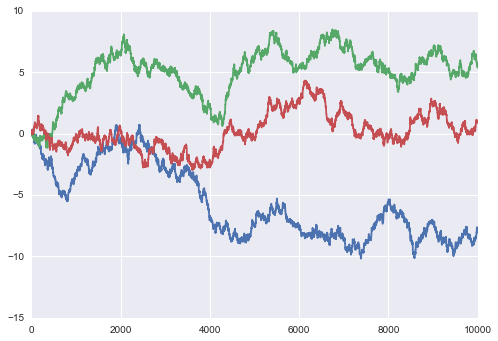

In [46]:
plt.plot(qweights.params.eval())

In [47]:
from metropolis_hastings_y import MetropolisHastingsY

In [48]:
inference = MetropolisHastingsY({weights: qweights},
                      {weights: gweights},
                      {Y: X})

In [49]:
inference.run()

10000/10000 [100%] ██████████████████████████████ Elapsed: 6s | Acceptance Rate: 0.529


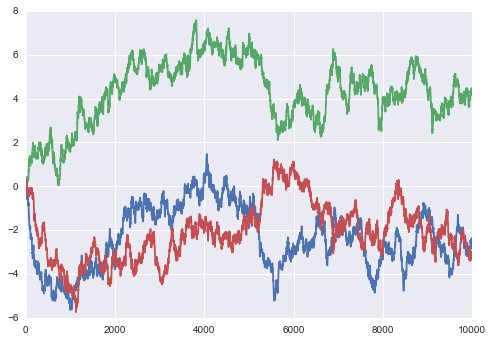

In [50]:
plt.plot(qweights.params.eval())

10000/10000 [100%] ██████████████████████████████ Elapsed: 6s | Acceptance Rate: 0.525


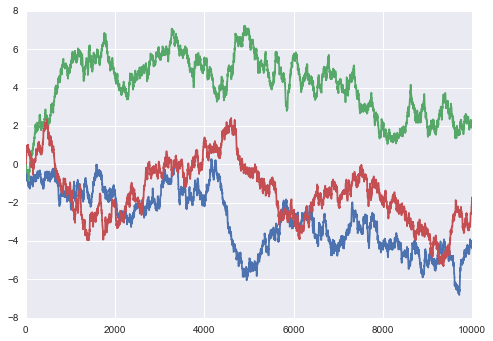

In [52]:
inference = MetropolisHastingsY({weights: qweights},
                      {weights: gweights},
                      {Y: X})
inference.run()
plt.plot(qweights.params.eval())

10000/10000 [100%] ██████████████████████████████ Elapsed: 6s | Acceptance Rate: 0.527


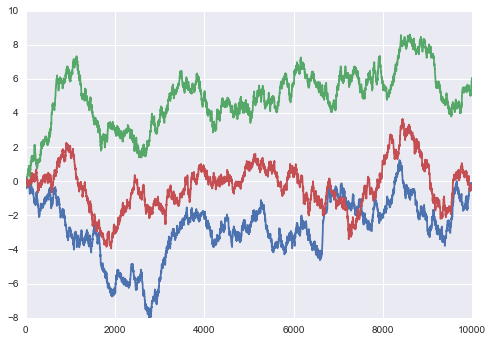

In [53]:
inference = ed.MetropolisHastings({weights: qweights},
                      {weights: gweights},
                      {Y: X})
inference.run()
plt.plot(qweights.params.eval())

In [73]:
fit_weights = qweights.params.eval()[5000:]

In [74]:
def logit(x):
    return np.log(x/(1-x))
def logistic(x):
    return 1/(1+np.exp(-x))

In [75]:
probs = np.transpose(logistic(fit_weights).T / np.tile(np.sum(logistic(fit_weights),1),(3,1)))

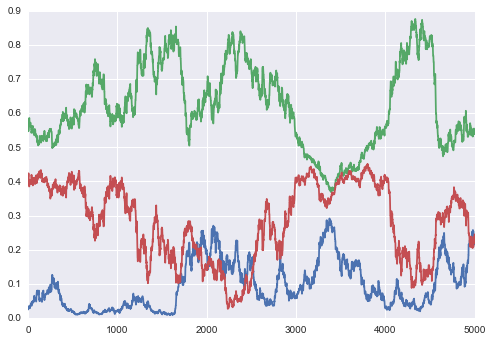

In [76]:
plt.plot(probs)

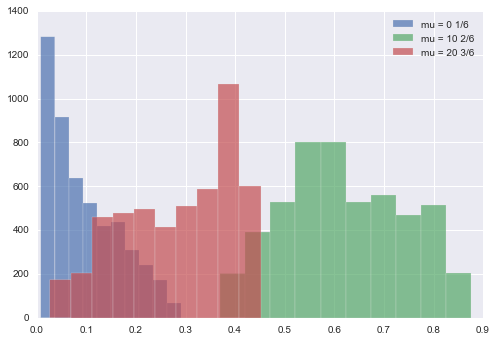

In [83]:
plt.hist(probs[:,0],alpha=0.7,label='mu = 0 1/6')
plt.hist(probs[:,1],alpha=0.7,label='mu = 10 2/6')
plt.hist(probs[:,2],alpha=0.7,label='mu = 20 3/6')
plt.legend()
plt.show()

我们可以观测到本来应该最多的$\mu =20$这类的并没有被判定为最多的，而是中间的$\mu=10$，由于中间的可以左右逢源，
这有一定的道理。说不定后验分布还真是这个样子。

另外我们高兴地发现这表明了一种可行的编码混合模型的方案。取代那个智障的狄利克雷分布。

In [ ]:
np.